EXPLORATORY DATA ANALYSIS

REQUIREMENTS:
To Use NumPy, Pandas and Matplotlib for respective analysis

In [6]:
'''
Data loading and exploration:
o Load the dataset into a Pandas DataFrame.
o Explore the dataset&#39;s shape, data types, and descriptive statistics.
o Identify missing values (if any) and handle them appropriately.
'''

#Loading the dataset using read_csv function of pandas
import pandas as pd
df=pd.read_csv("dataset1.csv")

In [7]:
df.head(20)

,Duration,Pulse,Maxpulses,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.5
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [8]:
'''Analysing the shape, type and descriptive statistics of the dataset'''
#Shape attribute of the dataframe 
print("Shape of the dataframe(dataset1):", df.shape) #Gives a <tuple object> as an insight on the number of rows and columns "(169,4)"


Shape of the dataframe(dataset1): (169, 4)


In [9]:
#Obtaining the Datatypes associated using the dtype function
datatypes=df.dtypes
print("Datatypes:",datatypes)

Datatypes: Duration       int64
Pulse          int64
Maxpulses      int64
Calories     float64
dtype: object


In [10]:
#Descriptive stats of the dataset
desc=df.describe()
print("Description of the numerical data present:\n",desc)

Description of the numerical data present:
          Duration       Pulse   Maxpulses     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.800000
std     42.299949   14.510259   16.450434   266.377134
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [19]:
'''Identifying missing values and handling the same.'''
#Analysing missing values using isnull()
missing_val=df.isnull().sum()
print(missing_val)


Duration     0
Pulse        0
Maxpulses    0
Calories     5
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

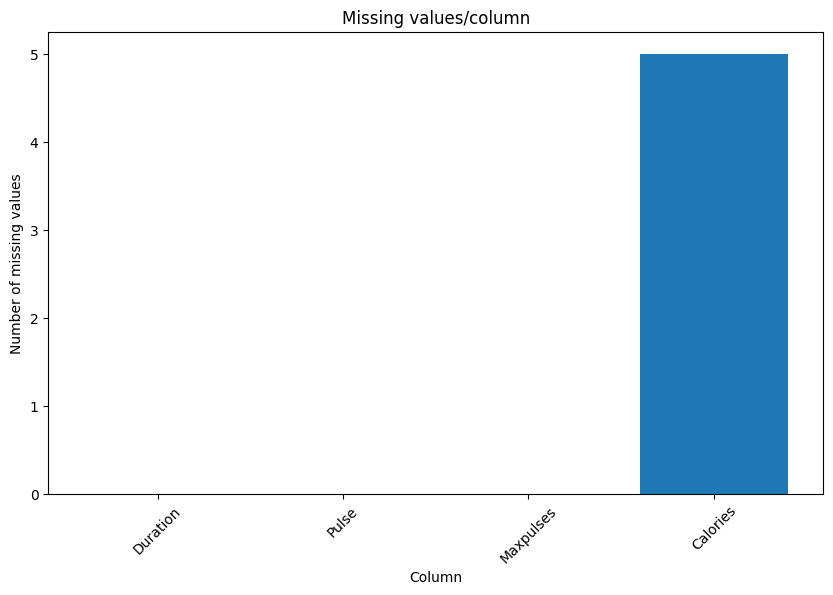

In [21]:
#Visualizing the missing values using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(missing_val.index,missing_val.values)
plt.xticks(rotation=45)
plt.title("Missing values/column")
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.show

Sum of the absolute difference from original (mean): Duration     0.0
Pulse        0.0
Maxpulses    0.0
Calories     0.0
dtype: float64
Sum of the absolute difference from original (median): Duration     0.0
Pulse        0.0
Maxpulses    0.0
Calories     0.0
dtype: float64


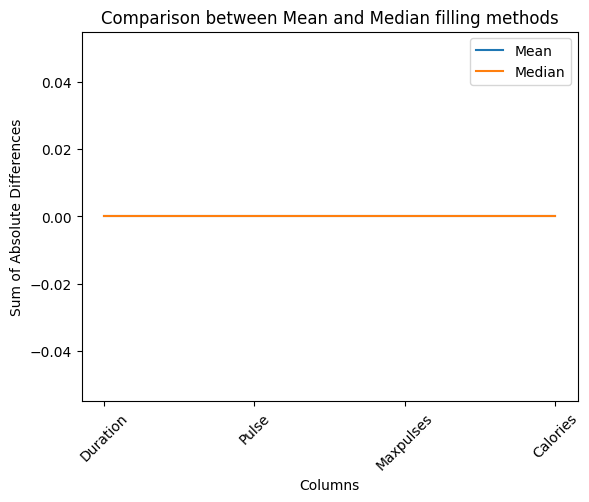

In [32]:
'''
Given its a numerical column (Calories), we handle the situation either by:
        1)dropping rows containing misssing values.
        2) Filling the missing values using mean for numerical data, mode for categorical data.
'''
#Mean
df_mean=df.copy()
df_mean['Calories']=df_mean['Calories'].fillna(df_mean['Calories'].mean())

#Median
df_median=df.copy()
df_median['Calories']=df_median['Calories'].fillna(df_median['Calories'].median())

#Statistical variation
mean_diff=(df_mean-df).abs().sum()
median_diff=(df_median-df).abs().sum()

#Difference obtained statistically
print("Sum of the absolute difference from original (mean):",mean_diff)
print("Sum of the absolute difference from original (median):",median_diff)

#Visulaizing the diffference between the two methods
plt.plot(df.columns,mean_diff,label="Mean")
plt.plot(df.columns,median_diff,label="Median")
plt.title("Comparison between Mean and Median filling methods")
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Sum of Absolute Differences")
plt.legend()
plt.show()

Duration     0
Pulse        0
Maxpulses    0
Calories     0
dtype: int64


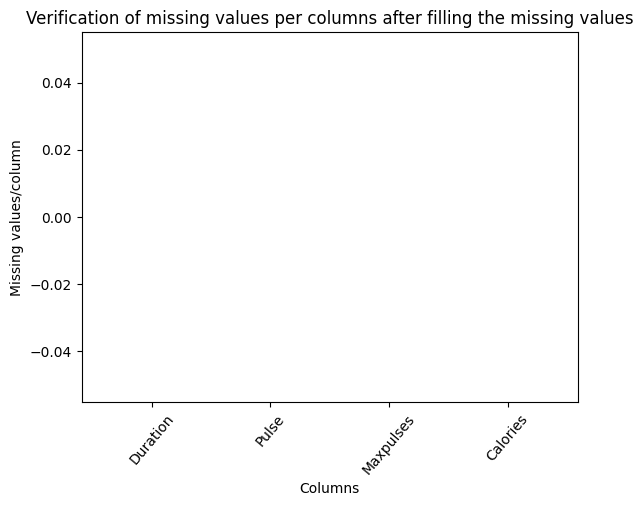

In [27]:
#Verification of the values.
miss_val=df.isnull().sum()
print(miss_val)
#or
plt.bar(miss_val.index,miss_val.values)
plt.xticks(rotation=50)
plt.title("Verification of missing values per columns after filling the missing values")
plt.xlabel("Columns")
plt.ylabel("Missing values/column")
plt.show()

In [35]:
#Feature Analysis using NumPy
#Returning the mean, median, quartile percentage
import numpy as np
number_df=df.select_dtypes(include=[np.number])
stat={}
for column in number_df.columns:
    mean=np.mean(number_df[column])
    median=np.median(number_df[column])
    std_dev=np.std(number_df[column])
    perc=np.percentile(number_df[column],[25,50,75])
stat[column]={
    "Mean":mean,
    "Median":median,
    "Standard Deviation":std_dev,
    "Quartile Percentage":perc
    }
stat_df=pd.DataFrame(stat).T
print(stat_df)

           Mean Median Standard Deviation    Quartile Percentage
Calories  375.8  321.0         261.605814  [253.3, 321.0, 384.0]


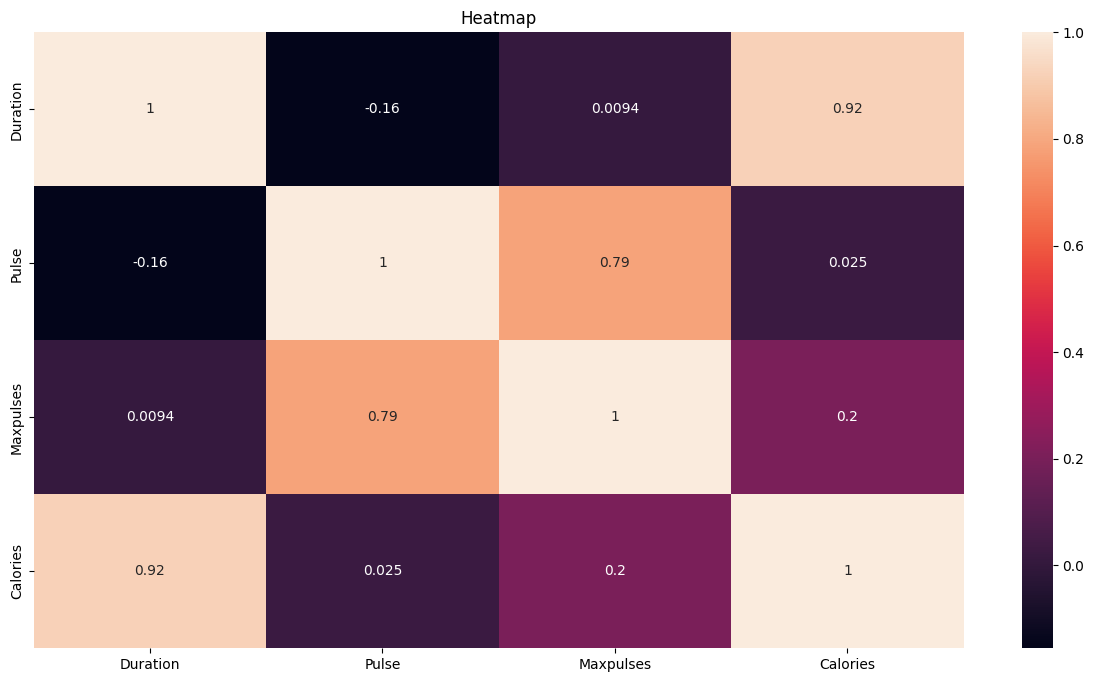

In [14]:
#Create a correlation matrix using Pandas and visualize it using a heatmap in matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('dataset1.csv')
corr_matrix=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)
plt.title("Heatmap")

plt.show()

In [13]:
#Identify the top 5 features that are most correlated with the target variable.
#target=Calories
target_corr=corr_matrix['Calories']
abs_target_corr=target_corr.abs()
top_5=abs_target_corr.sort_values(ascending=False).head(6)
top_5=top_5.drop('Calories')
print(top_5)

Duration     0.922721
Maxpulses    0.203814
Pulse        0.025120
Name: Calories, dtype: float64


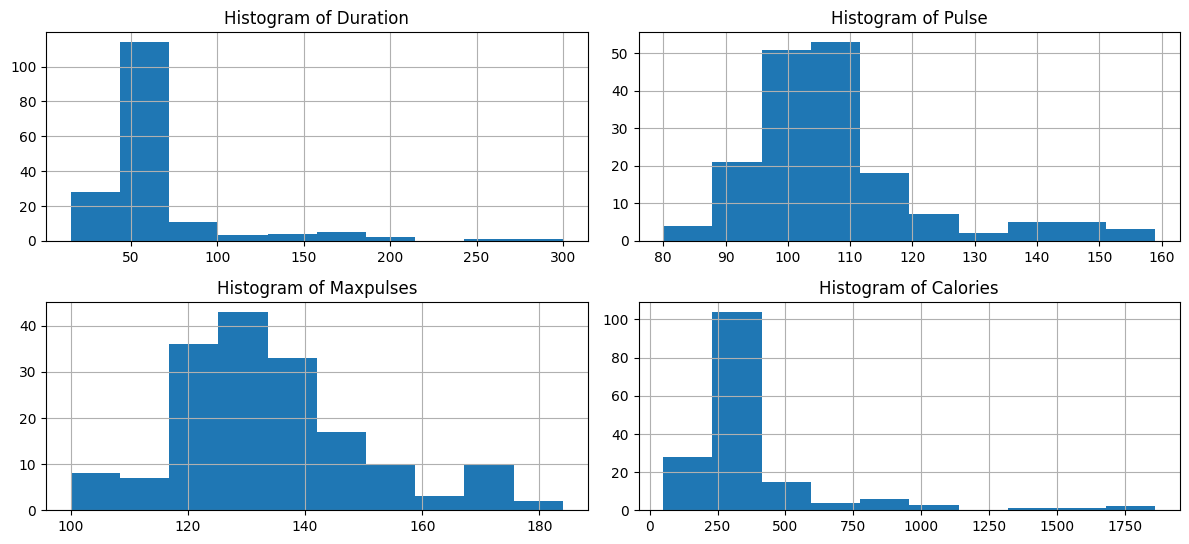

In [22]:
#Creating the histograms for the numerical features
numerical_features=['Duration','Pulse','Maxpulses','Calories']
plt.figure(figsize=(12,8))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    df[feature].hist()
    plt.title(f"Histogram of {feature}")
plt.tight_layout()
plt.show()


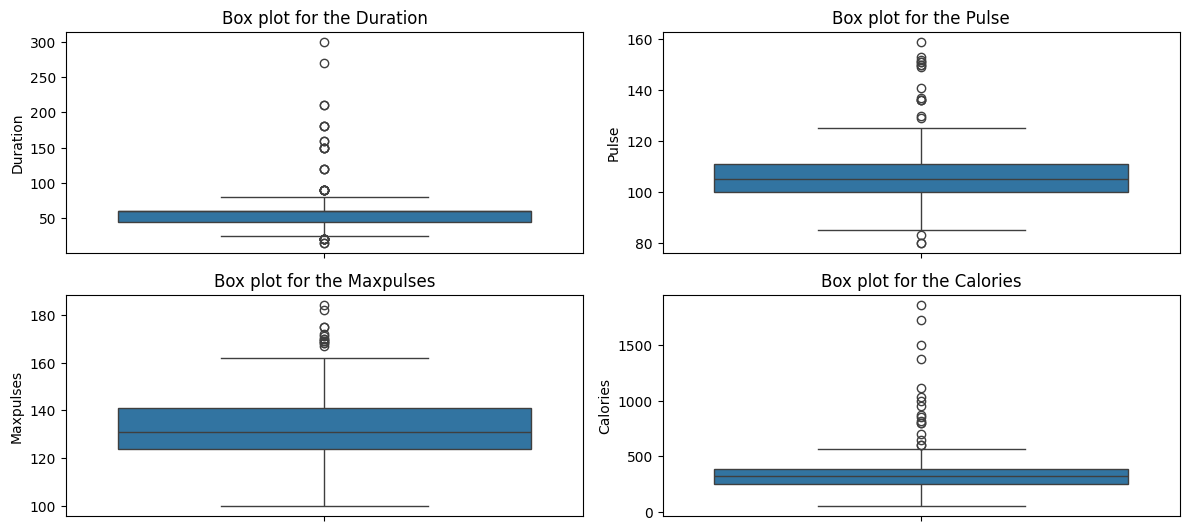

In [24]:
#Creating box plots
plt.figure(figsize=(12,8))
for i,feature in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    sns.boxplot(df[feature])
    plt.title(f"Box plot for the {feature}")
plt.tight_layout()
plt.show()

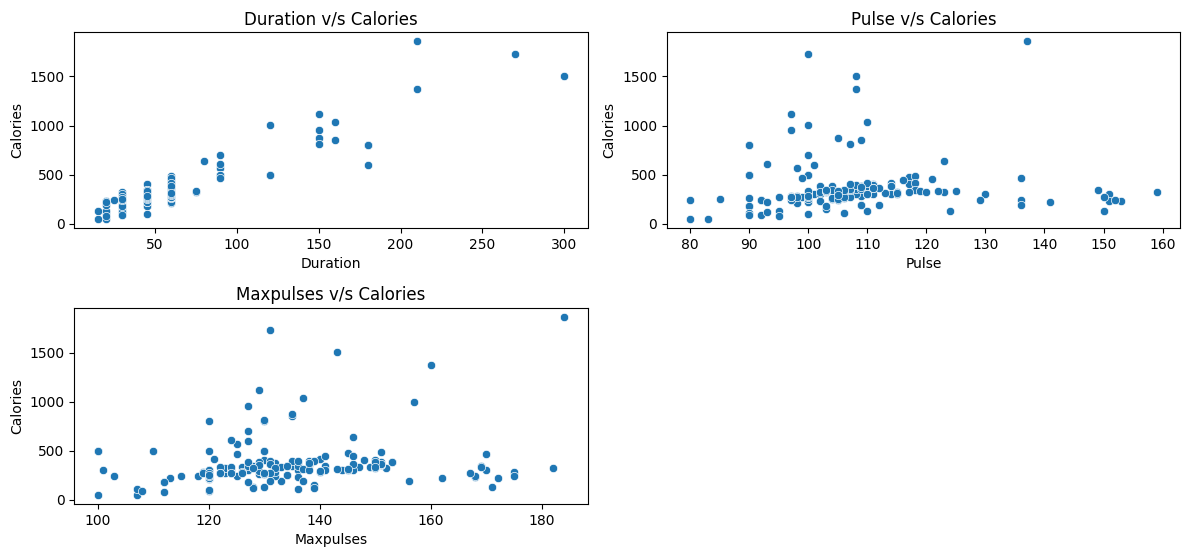

In [26]:
#Visualizing the comparison between target and key features
df.head()
target='Calories'
key_features=['Duration','Pulse','Maxpulses']
plt.figure(figsize=(12,8))
for i, feature in enumerate(key_features,1):
    plt.subplot(3,2,i)
    if df[feature].dtypes=="object":
        sns.barplot(x=feature,y=target,data=df)
    else:
        sns.scatterplot(x=feature,y=target,data=df)
    plt.title(f"{feature} v/s {target}")
plt.tight_layout()
plt.show()

In [30]:
df.head()
df['Calories/minute']=df['Calories']/df['Duration'] #Creation of a new feature that is obtained from the Calories and Duration features
df ['Meanpulse']=df['Maxpulses']-df['Pulse']/2 #Creation of a new feature that is obtained from Maxpulses and Pulse
df.head()


,Duration,Pulse,Maxpulses,Calories,Calories/minute,Meanpulse
0,60,110,130,409.1,6.818333,75.0
1,60,117,145,479.0,7.983333,86.5
2,60,103,135,340.0,5.666667,83.5
3,45,109,175,282.4,6.275556,120.5
4,45,117,148,406.0,9.022222,89.5


Insights:

It has been noted that filling the blanks instead of dropping and removing outliers using the median strategy is ideal.

Conclusion:

Successfully performed Exploratory Data Analysis on the given dataset, with a special emphasis on feature engineering and creation.

In [4]:
import os
print(os.getcwd())

c:\Users\sreek\AppData\Local\Programs\Microsoft VS Code


In [5]:
os.chdir(r"C:\Users\sreek\AppData\Local\Programs\Microsoft VS Code\Data Repository\Data Repository")